In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Qchains
import plotly.graph_objects as go
from scipy.optimize import curve_fit

## Varier distance to defect

Validate approach: 

In [2]:
###Created by two individual chains so we can varu the array added to chain 2###
chain1 = Qchains.ArrayGenerator(20, False)
chain2 = Qchains.ArrayGenerator(20, False)
chain2 = chain2 + np.array([21, 0 , 0])  
added_chain = np.concatenate((chain1, chain2))

###Created by removing middle atom
chain41 = Qchains.ArrayGenerator(41)
middle_index_41 = len(chain41) // 2
chain_40c_missing = np.delete(chain41, middle_index_41, axis=0)

#print(added_chain == chain_40c_missing) #returs all true

#most subradiant state
d_fixed = 0.25   #r_ij = lambda/4
dipole_hat = np.array([1, 0, 0])

eigval_added, eigvec_added = Qchains.FindEigenstates(added_chain, dipole_hat, d_fixed)
sub_radiant_added =  np.max(2 * eigval_added.real)

eigval_trad, eigvec_trad = Qchains.FindEigenstates(chain_40c_missing, dipole_hat, d_fixed)
sub_radiant_trad =  np.max(2 * eigval_trad.real)

sub_radiant_added == sub_radiant_trad

True

The key is we can varry the array we add to chain2 and loop over it to get an expression for 

#### For $d = 0.5$ i.e. $r_{ij} = \frac{\lambda_e}{2}$ and polarized in x

In [3]:
d_fixed_50 = 0.5
dipole_hat_x = np.array([1, 0, 0])

delta = np.array([26, 0, 0]) 
R = np.linspace(-1.9, 11.5, 10000) #as we gonna take delta + R so for -1 corresponds to non-interrupted array, 0 corresponds to "normal" interrupted. 
R_vectors = np.zeros((R.size, 3))
R_vectors[:, 0] = R

sub_radiant_decay_list = []

for r in R_vectors:
    chain1 = Qchains.ArrayGenerator(25, False)
    chain2 = Qchains.ArrayGenerator(25, False)
    chain2 = chain2 + delta + r
    added_chain_r = np.concatenate((chain1, chain2))

    eigval_added_r, eigvec_added_r = Qchains.FindEigenstates(added_chain_r, dipole_hat_x, d_fixed_50)
    sub_radiant_added_r =  -np.max(2 * eigval_added_r.real)
    sub_radiant_decay_list.append(sub_radiant_added_r)

In [4]:
## For comparison## 
#Normal 40 chain. Corresponding to R = -1
chain_50 = Qchains.ArrayGenerator(50)
eig_val_50, eig_vec_50 = Qchains.FindEigenstates(chain_50, dipole_hat_x, d_fixed_50)
sub_radiant_50 = -np.max(2 * eig_val_50.real)
print(sub_radiant_50)

#Normal 20 chai. Corresponds to R large (however should be 2 of them)
chain_25 = Qchains.ArrayGenerator(25)
eig_val_25, eig_vec_25 = Qchains.FindEigenstates(chain_25, dipole_hat_x, d_fixed_50)
sub_radiant_25 = -np.max(2 * eig_val_25.real)
print(sub_radiant_25)

#Interrupted chain. Corresponds to R = 2 that is full lambda in between
chain51 = Qchains.ArrayGenerator(51)
middle_index_51 = len(chain51) // 2
chain_50c_missing = np.delete(chain51, middle_index_51, axis=0)
eig_val_50c_missing, eig_vec_50c_missing = Qchains.FindEigenstates(chain_50c_missing, dipole_hat_x, d_fixed_50)
sub_radiant_50c_missing = -np.max(2 * eig_val_50c_missing.real)
print(sub_radiant_50c_missing)

0.04311430260693842
0.08427554196644464
0.062246021756743236


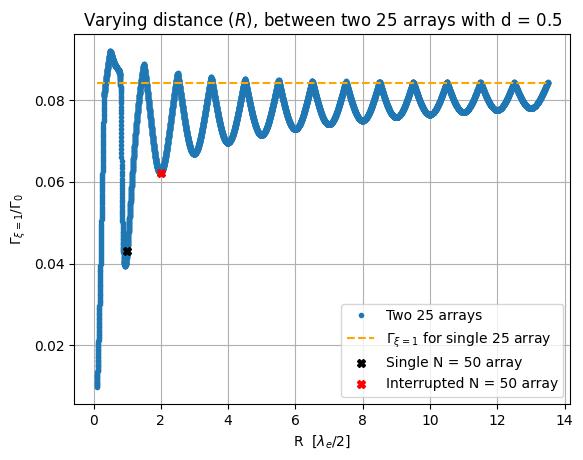

In [5]:
plt.plot(R + 2, sub_radiant_decay_list, '.', label = 'Two 25 arrays')
plt.hlines(sub_radiant_25, np.min(R) + 2, np.max(R) + 2, linestyles='--', color='orange', label = r'$\Gamma_{\xi=1}$ for single 25 array')
plt.plot(1, sub_radiant_50, 'X', color = 'black', label = 'Single N = 50 array')
plt.plot(2, sub_radiant_50c_missing, 'X', label = 'Interrupted N = 50 array', color = 'red')

#plt.plot(1., 0.09, 'X', color= 'red', label = 'half value of R')

plt.title(r'Varying distance ($R$), between two 25 arrays with d = 0.5', fontsize = 12)

plt.xlabel(r'R  $[\lambda_e/2]$' )
plt.ylabel(r'$\Gamma_{\xi = 1} / \Gamma_0$')
plt.grid()
plt.legend();

For new value of d ($d=0.25$)  (r_ij = 0.25)

In [6]:
d_fixed_50_2 = 0.25
dipole_hat_x = np.array([1, 0, 0])

delta = np.array([26, 0, 0]) 
R = np.linspace(-1.9, 11.5, 10000) #as we gonna take delta + R so for -1 corresponds to non-interrupted array, 0 corresponds to "normal" interrupted. 
R_vectors = np.zeros((R.size, 3))
R_vectors[:, 0] = R

sub_radiant_decay_list_2 = []

for r in R_vectors:
    chain1 = Qchains.ArrayGenerator(25, False)
    chain2 = Qchains.ArrayGenerator(25, False)
    chain2 = chain2 + delta + r
    added_chain_r = np.concatenate((chain1, chain2))

    eigval_added_r, eigvec_added_r = Qchains.FindEigenstates(added_chain_r, dipole_hat_x, d_fixed_50_2)
    sub_radiant_added_r =  -np.max(2 * eigval_added_r.real)
    sub_radiant_decay_list_2.append(sub_radiant_added_r)

In [7]:
## For comparison## 
#Normal 40 chain. Corresponding to R = -1
chain_50_2 = Qchains.ArrayGenerator(50)
eig_val_50_2, eig_vec_50_2 = Qchains.FindEigenstates(chain_50_2, dipole_hat_x, d_fixed_50_2)
sub_radiant_50_2 = -np.max(2 * eig_val_50_2.real)
print(sub_radiant_50_2)

#Normal 20 chai. Corresponds to R large (however should be 2 of them)
chain_25_2 = Qchains.ArrayGenerator(25)
eig_val_25_2, eig_vec_25_2 = Qchains.FindEigenstates(chain_25_2, dipole_hat_x, d_fixed_50_2)
sub_radiant_25_2 = -np.max(2 * eig_val_25_2.real)
print(sub_radiant_25_2)

#Interrupted chain. Corresponds to R = 2 that is full lambda in between
chain51_2 = Qchains.ArrayGenerator(51)
middle_index_51_2 = len(chain51_2) // 2
chain_50_2c_missing = np.delete(chain51_2, middle_index_51_2, axis=0)
eig_val_50_2c_missing, eig_vec_50_2c_missing = Qchains.FindEigenstates(chain_50_2c_missing, dipole_hat_x, d_fixed_50_2)
sub_radiant_50_2c_missing = -np.max(2 * eig_val_50_2c_missing.real)
print(sub_radiant_50_2c_missing)

1.683627621377957e-05
0.0001298453893430007
6.378054387129735e-05


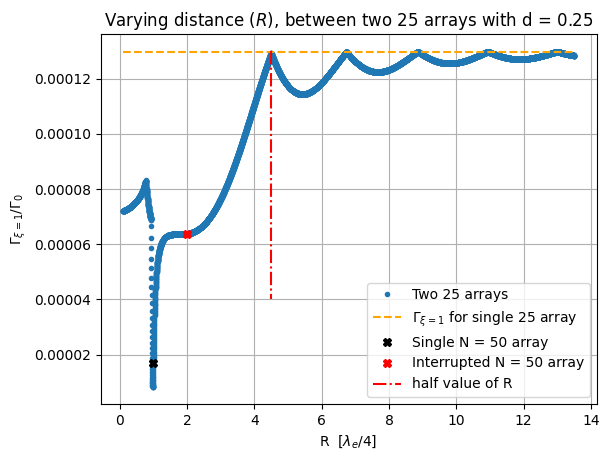

In [8]:
plt.plot(R + 2, sub_radiant_decay_list_2, '.', label = 'Two 25 arrays')
plt.hlines(sub_radiant_25_2, np.min(R) + 2, np.max(R) + 2, linestyles='--', color='orange', label = r'$\Gamma_{\xi=1}$ for single 25 array')
plt.plot(1, sub_radiant_50_2, 'X', color='black', label = 'Single N = 50 array')
plt.plot(2, sub_radiant_50_2c_missing, 'X', label = 'Interrupted N = 50 array', color = 'red')
plt.vlines(4.5, 0.00013, 0.00004, color= 'red',  linestyles= '-.', label = 'half value of R') #Seems like the periode for good subradiant are 2.25 as they appear at 5.5, 7.75, 10,

plt.title(r'Varying distance ($R$), between two 25 arrays with d = 0.25')
plt.xlabel(r'R  $[\lambda_e/4]$' )
plt.ylabel(r'$\Gamma_{\xi = 1} / \Gamma_0$')
plt.grid()
plt.legend();

##### For other values of R to see they naturally morph into each other. 

0.0022480327086254193
0.02182174101807178
0.015765960766571965


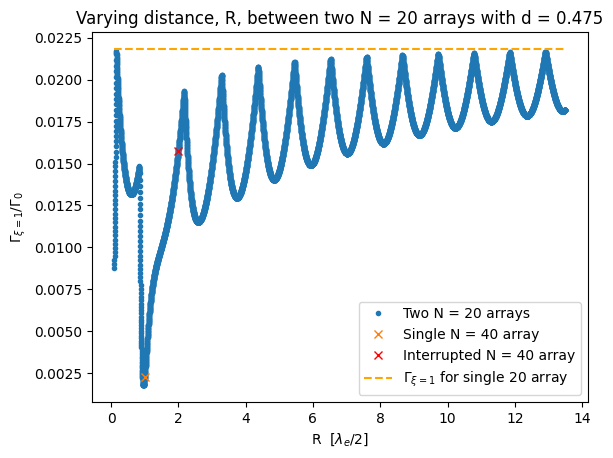

In [9]:
d_fixed_40_3 = 0.475
dipole_hat_x = np.array([1, 0, 0])

delta = np.array([21, 0, 0]) 
R = np.linspace(-1.9, 11.5, 10000) #as we gonna take delta + R so for -1 corresponds to non-interrupted array, 0 corresponds to "normal" interrupted. 
R_vectors = np.zeros((R.size, 3))
R_vectors[:, 0] = R

sub_radiant_decay_list_2 = []

for r in R_vectors:
    chain1 = Qchains.ArrayGenerator(20, False)
    chain2 = Qchains.ArrayGenerator(20, False)
    chain2 = chain2 + delta + r
    added_chain_r = np.concatenate((chain1, chain2))

    eigval_added_r, eigvec_added_r = Qchains.FindEigenstates(added_chain_r, dipole_hat_x, d_fixed_40_3)
    sub_radiant_added_r =  -np.max(2 * eigval_added_r.real)
    sub_radiant_decay_list_2.append(sub_radiant_added_r)

## For comparison## 
#Normal 40 chain. Corresponding to R = -1
chain_40_2 = Qchains.ArrayGenerator(40)
eig_val_40_2, eig_vec_40_2 = Qchains.FindEigenstates(chain_40_2, dipole_hat_x, d_fixed_40_3)
sub_radiant_40_2 = -np.max(2 * eig_val_40_2.real)
print(sub_radiant_40_2)

#Normal 20 chai. Corresponds to R large (however should be 2 of them)
chain_20_2 = Qchains.ArrayGenerator(20)
eig_val_20_2, eig_vec_20_2 = Qchains.FindEigenstates(chain_20_2, dipole_hat_x, d_fixed_40_3)
sub_radiant_20_2 = -np.max(2 * eig_val_20_2.real)
print(sub_radiant_20_2)

#Interrupted chain. Corresponds to R = 2 that is full lambda in between
chain41_2 = Qchains.ArrayGenerator(41)
middle_index_41_2 = len(chain41_2) // 2
chain_40_2c_missing = np.delete(chain41_2, middle_index_41_2, axis=0)
eig_val_40_2c_missing, eig_vec_40_2c_missing = Qchains.FindEigenstates(chain_40_2c_missing, dipole_hat_x, d_fixed_40_3)
sub_radiant_40_2c_missing = -np.max(2 * eig_val_40_2c_missing.real)
print(sub_radiant_40_2c_missing)

plt.plot(R + 2, sub_radiant_decay_list_2, '.', label = 'Two N = 20 arrays')
plt.plot(1, sub_radiant_40_2, 'x', label = 'Single N = 40 array')
plt.plot(2, sub_radiant_40_2c_missing, 'x', label = 'Interrupted N = 40 array', color = 'red')
plt.hlines(sub_radiant_20_2, np.min(R) + 2, np.max(R) + 2, linestyles='--', color='orange', label = r'$\Gamma_{\xi=1}$ for single 20 array')
#plt.vlines(5.5, 0.00025, 0.00004, color= 'red',  linestyles= '-.', label = 'half value of R') #Seems like the periode for good subradiant are 2.25 as they appear at 5.5, 7.75, 10,

plt.title('Varying distance, R, between two N = 20 arrays with d = 0.475')
plt.xlabel(r'R  $[\lambda_e/2]$' )
plt.ylabel(r'$\Gamma_{\xi = 1} / \Gamma_0$')
plt.legend();

## For two N = 40 chains

In [10]:
d_fixed_80_1 = 0.5
dipole_hat_x = np.array([1, 0, 0])

delta_80 = np.array([41, 0, 0]) 
R = np.linspace(-1.9, 11.5, 5000) #as we gonna take delta + R so for -1 corresponds to non-interrupted array, 0 corresponds to "normal" interrupted. 
R_vectors = np.zeros((R.size, 3))
R_vectors[:, 0] = R

sub_radiant_decay_list_80_1 = []

for r in R_vectors:
    chain1 = Qchains.ArrayGenerator(40, False)
    chain2 = Qchains.ArrayGenerator(40, False)
    chain2 = chain2 + delta_80 + r
    added_chain_r = np.concatenate((chain1, chain2))

    eigval_added_r, eigvec_added_r = Qchains.FindEigenstates(added_chain_r, dipole_hat_x, d_fixed_80_1)
    sub_radiant_added_r =  -np.max(2 * eigval_added_r.real)
    sub_radiant_decay_list_80_1.append(sub_radiant_added_r)

## For comparison## 
#Normal 40 chain. Corresponding to R = -1
chain_80_1 = Qchains.ArrayGenerator(80)
eig_val_80_1, eig_vec_80_1 = Qchains.FindEigenstates(chain_80_1, dipole_hat_x, d_fixed_80_1)
sub_radiant_80_1 = -np.max(2 * eig_val_80_1.real)
print(sub_radiant_80_1)

#Normal 20 chai. Corresponds to R large (however should be 2 of them)
chain_40_1 = Qchains.ArrayGenerator(40)
eig_val_40_1, eig_vec_40_1 = Qchains.FindEigenstates(chain_40_1, dipole_hat_x, d_fixed_80_1)
sub_radiant_40_1 = -np.max(2 * eig_val_40_1.real)
print(sub_radiant_40_1)

#Interrupted chain. Corresponds to R = 2 that is full lambda in between
chain_81_1 = Qchains.ArrayGenerator(81)
middle_index_81_2 = len(chain_81_1) // 2
chain_80_1c_missing = np.delete(chain_81_1, middle_index_81_2, axis=0)
eig_val_80_1c_missing, eig_vec_80_1c_missing = Qchains.FindEigenstates(chain_80_1c_missing, dipole_hat_x, d_fixed_80_1)
sub_radiant_80_1c_missing = -np.max(2 * eig_val_80_1c_missing.real)
print(sub_radiant_80_1c_missing)

0.027189933402237493
0.053578558141153566
0.03856008381131294


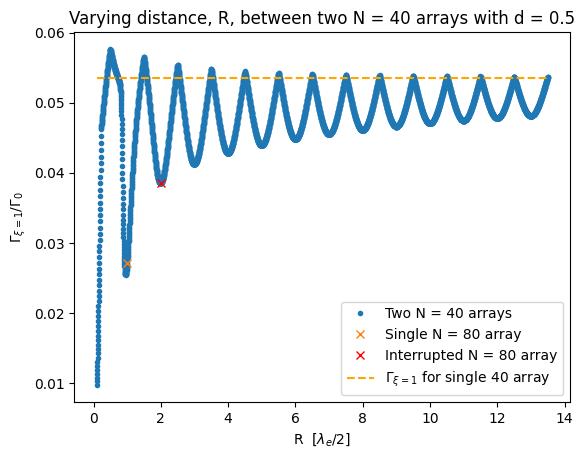

In [11]:
plt.plot(R + 2, sub_radiant_decay_list_80_1, '.', label = 'Two N = 40 arrays')
plt.plot(1, sub_radiant_80_1, 'x', label = 'Single N = 80 array')
plt.plot(2, sub_radiant_80_1c_missing, 'x', label = 'Interrupted N = 80 array', color = 'red')
plt.hlines(sub_radiant_40_1, np.min(R) + 2, np.max(R) + 2, linestyles='--', color='orange', label = r'$\Gamma_{\xi=1}$ for single 40 array')
#plt.vlines(2.5, 0.06, 0.01, color= 'red',  linestyles= '-.', label = 'half value of R') #Seems like the periode for good subradiant are 2.25 as they appear at 5.5, 7.75, 10,

plt.title('Varying distance, R, between two N = 40 arrays with d = 0.5')
plt.xlabel(r'R  $[\lambda_e/2]$' )
plt.ylabel(r'$\Gamma_{\xi = 1} / \Gamma_0$')
plt.legend()

In [12]:
d_fixed_80_2 = 0.25
dipole_hat_x = np.array([1, 0, 0])

delta_80 = np.array([41, 0, 0]) 
R = np.linspace(-1.9, 11.5, 5000) #as we gonna take delta + R so for -1 corresponds to non-interrupted array, 0 corresponds to "normal" interrupted. 
R_vectors = np.zeros((R.size, 3))
R_vectors[:, 0] = R

sub_radiant_decay_list_80_2 = []

for r in R_vectors:
    chain1 = Qchains.ArrayGenerator(40, False)
    chain2 = Qchains.ArrayGenerator(40, False)
    chain2 = chain2 + delta_80 + r
    added_chain_r = np.concatenate((chain1, chain2))

    eigval_added_r, eigvec_added_r = Qchains.FindEigenstates(added_chain_r, dipole_hat_x, d_fixed_80_2)
    sub_radiant_added_r =  -np.max(2 * eigval_added_r.real)
    sub_radiant_decay_list_80_2.append(sub_radiant_added_r)

## For comparison## 
#Normal 40 chain. Corresponding to R = -1
chain_80_2 = Qchains.ArrayGenerator(80)
eig_val_80_2, eig_vec_80_2 = Qchains.FindEigenstates(chain_80_2, dipole_hat_x, d_fixed_80_2)
sub_radiant_80_2 = -np.max(2 * eig_val_80_2.real)
print(sub_radiant_80_2)

#Normal 20 chai. Corresponds to R large (however should be 2 of them)
chain_40_2 = Qchains.ArrayGenerator(40)
eig_val_40_2, eig_vec_40_2 = Qchains.FindEigenstates(chain_40_2, dipole_hat_x, d_fixed_80_2)
sub_radiant_40_2 = -np.max(2 * eig_val_40_2.real)
print(sub_radiant_40_2)

#Interrupted chain. Corresponds to R = 2 that is full lambda in between
chain_81_2 = Qchains.ArrayGenerator(81)
middle_index_81_2 = len(chain_81_2) // 2
chain_80_2c_missing = np.delete(chain_81_2, middle_index_81_2, axis=0)
eig_val_80_2c_missing, eig_vec_80_2c_missing = Qchains.FindEigenstates(chain_80_2c_missing, dipole_hat_x, d_fixed_80_2)
sub_radiant_80_2c_missing = -np.max(2 * eig_val_80_2c_missing.real)
print(sub_radiant_80_2c_missing)

4.171100597465636e-06
3.251592817191267e-05
1.6102860740915106e-05


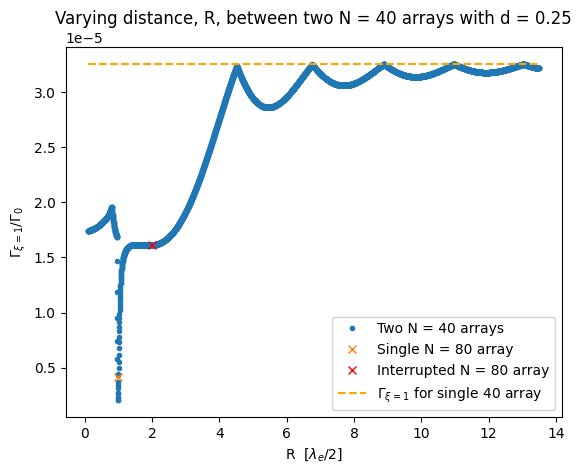

In [13]:
plt.plot(R + 2, sub_radiant_decay_list_80_2, '.', label = 'Two N = 40 arrays')
plt.plot(1, sub_radiant_80_2, 'x', label = 'Single N = 80 array')
plt.plot(2, sub_radiant_80_2c_missing, 'x', label = 'Interrupted N = 80 array', color = 'red')
plt.hlines(sub_radiant_40_2, np.min(R) + 2, np.max(R) + 2, linestyles='--', color='orange', label = r'$\Gamma_{\xi=1}$ for single 40 array')
#plt.vlines(2.5, 0.06, 0.01, color= 'red',  linestyles= '-.', label = 'half value of R') #Seems like the periode for good subradiant are 2.25 as they appear at 5.5, 7.75, 10,

plt.title('Varying distance, R, between two N = 40 arrays with d = 0.25')
plt.xlabel(r'R  $[\lambda_e/2]$' )
plt.ylabel(r'$\Gamma_{\xi = 1} / \Gamma_0$')
plt.legend()

We see similar behaviour as in the $N = 40$ case. 

### Precision of calculations

In [14]:
np.finfo(np.float64)

finfo(resolution=1e-15, min=-1.7976931348623157e+308, max=1.7976931348623157e+308, dtype=float64)

In [15]:
np.finfo(np.float64).eps

2.220446049250313e-16